# Descripción del ejemplo a reproducir: 
## Cuenta de banco de un inversionista que inicialmente invierte 10 mil dolares y se desea hacer un seguimiento de la cuenta en un periodo de 15 años, siendo la variable aleatoria los intereses que va ganando el inversionista cada que pasa un periodo, esta será una distribución normal con media 0.1 y desviación estandar 0.01 y la variable salida o variable que se desea simular es el saldo total que el inversionista tendra después de los 15 años. 

#### Importando la librería creada

In [13]:
from Libreria.PyRisk import *

#### Definir las variables de entrada o variables aleatorias del ejercicio.

In [14]:
def varibles_entrada():

    return {"tasa":np.random.normal(loc=0.1,scale=0.01)}

#### Definir la función que reproducira el comportamiento del ejercicio que se planteó

In [15]:
def saldo(tasa):
  saldo=[10000]+[0]*15
  for i in range(1,16):
    tasa=tasa
    saldo[i]=saldo[i-1]*(1+tasa)
  return {"saldo":saldo[-1],"tasa":tasa}

#### Llamado de la función

In [16]:
saldo(**varibles_entrada())

{'saldo': 31655.402241976648, 'tasa': 0.07984939448952973}

In [17]:
# Instanciar la clase
s1=Simulator(3,1000,saldo,varibles_entrada,0.95)

In [18]:
# Se inicia la corrida de la simulación
s1.run_simulation()

In [19]:
# Se obtienen los resultados de las simulaciones
s1.get_simulations()

,simulacion,iteracion,saldo,tasa
0,0,0,42094.407489,0.100563
1,0,1,46830.426316,0.108414
2,0,2,53460.175102,0.118241
3,0,3,47713.686028,0.109795
4,0,4,30594.452224,0.077398
...,...,...,...,...
2995,2,995,52649.063463,0.117102
2996,2,996,48462.934193,0.110949
2997,2,997,36177.678837,0.089505
2998,2,998,34293.704040,0.085628


In [20]:
# Tabla resumen de cada una de las simulaciones
s1.summary_table()

,simulacion,variable,Mínimo,Máximo,Media,Desviación est,Varianza,Asimetría,Curtosis,Moda,Mediana,IC,Q1,Q2,Q3,IQR
0,0,saldo,26637.805963,63531.472027,41947.114312,5721.656959,3.273736e+07,0.364745,0.432482,26637.805963,41685.031205,"(41592.05868808605, 42302.169935923084)",38200.926013,41685.031205,45472.629289,7271.703275
1,0,tasa,0.067497,0.131182,0.099672,0.009999,9.997452e-05,-0.058927,0.225740,0.067497,0.099846,"(0.09905160013125329, 0.10029253571409129)",0.093465,0.099846,0.106242,0.012777
2,1,saldo,22807.963087,63732.919942,42498.700454,5675.345744,3.220955e+07,0.216738,0.150038,22807.963087,42417.017817,"(42146.518657631306, 42850.882249679016)",38528.720367,42417.017817,46341.181170,7812.460803
3,1,tasa,0.056507,0.131421,0.100650,0.009875,9.751585e-05,-0.177277,0.188951,0.056507,0.101123,"(0.1000369551224689, 0.10126253658904222)",0.094088,0.101123,0.107638,0.013550
4,2,saldo,27426.235159,62737.432313,42299.666132,5871.286052,3.447200e+07,0.422198,0.196156,27426.235159,42038.539396,"(41935.32532195675, 42664.00694255267)",38151.535311,42038.539396,45845.858575,7694.323265
5,2,tasa,0.069575,0.130234,0.100268,0.010123,1.024674e-04,0.051672,-0.103755,0.069575,0.100466,"(0.09963996909472032, 0.10089628081017941)",0.093371,0.100466,0.106845,0.013474


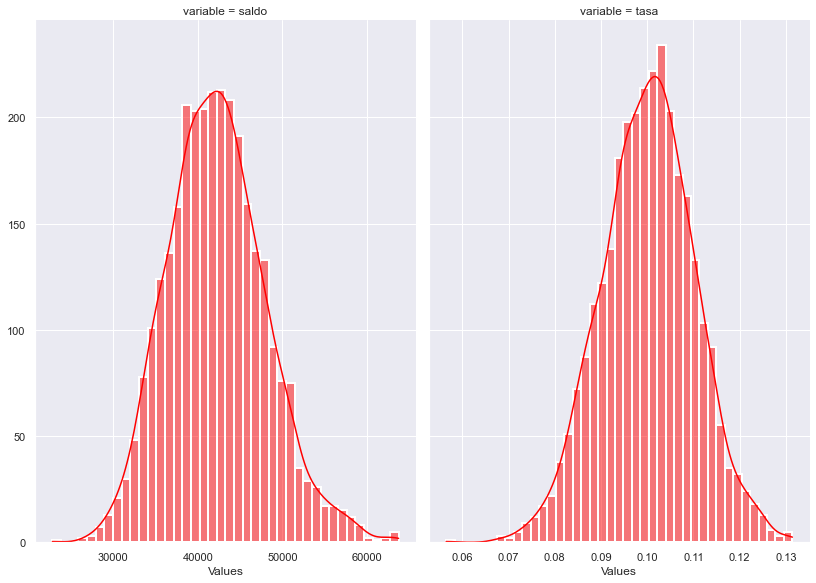

In [22]:
# Comportamiento de la simulación graficamente 
s1.histogram(kde=True,lw=2,color="red")

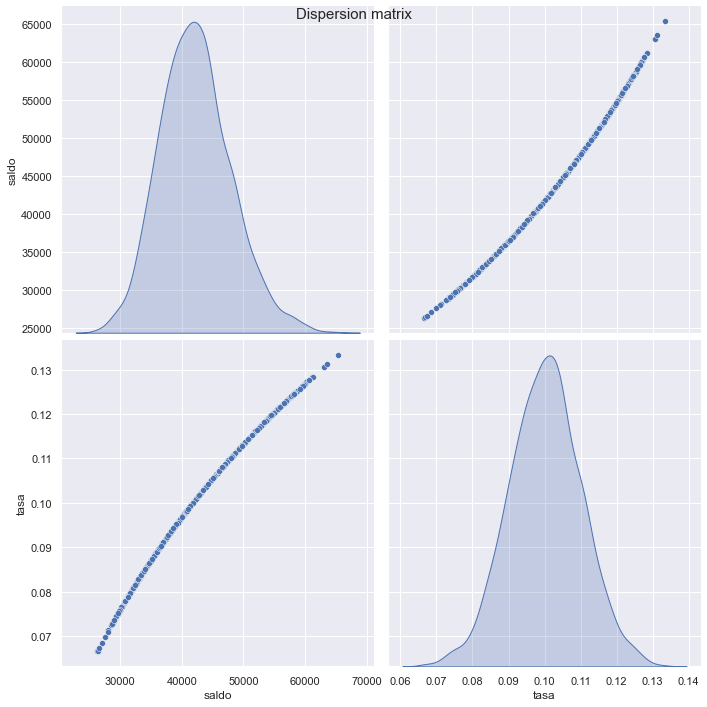

In [11]:
# Observar si de pronto existe una correlación entre las variables, además de ver su dispersión
s1.plot_matrix(plot_type='pairplot',columns=False,method='pearson')

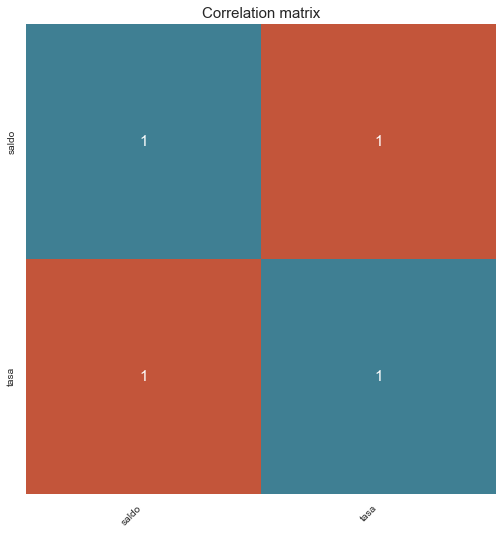

In [12]:
s1.plot_matrix(plot_type='corr_plot',columns=False,method='pearson')